In [1]:
"""Align 2 shapes: a simple line to a polygonal mesh"""
from vedo import *

settings.default_backend = '2d' # or k3d, ipyvtk,trame or vtk

limb = Mesh(dataurl + "270.vtk").alpha(0.5)
rim  = Mesh(dataurl + "270_rim.vtk").c("red4").lw(3)

# make a clone copy of the rim line and align it to the surface
arim = rim.clone().align_to(limb, rigid=True).c("g")

plt = Plotter()
plt += [limb, rim, arim]

# compute how well it fits
d = 0
for p in arim.vertices:
    cpt = limb.closest_point(p)
    d += mag2(p - cpt)  # square of residual distance

printc("ave. squared distance =", d / arim.npoints, c="g")
plt.show()

ave. squared distance = 43.20515185350062


AttributeError: module 'vedo' has no attribute 'backends'


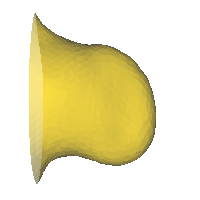

In [3]:
limb

In [2]:
?vedo


Object `vedo` not found.


In [3]:
vedo

NameError: name 'vedo' is not defined

In [6]:
import vedo.backends
